#### Created By: 
Iman sharifi --- 98210184

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def _plot(img, title='image', figsize=(10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(img), plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

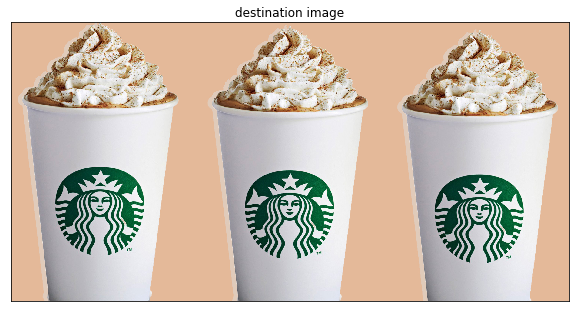

(1200, 2400, 3)


In [12]:
image = plt.imread("HW4\\2-3.jpg")
_plot(image, 'destination image')
print(image.shape)

# Ofline test

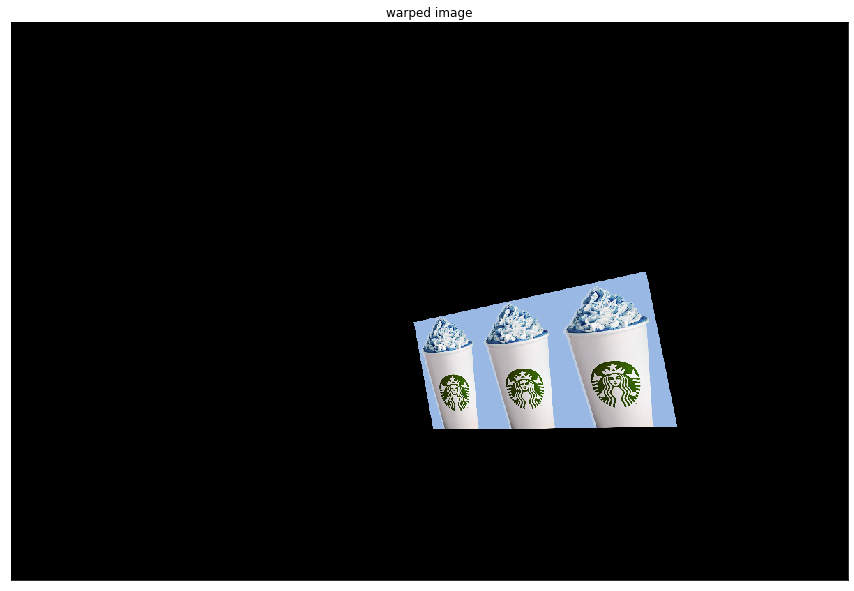

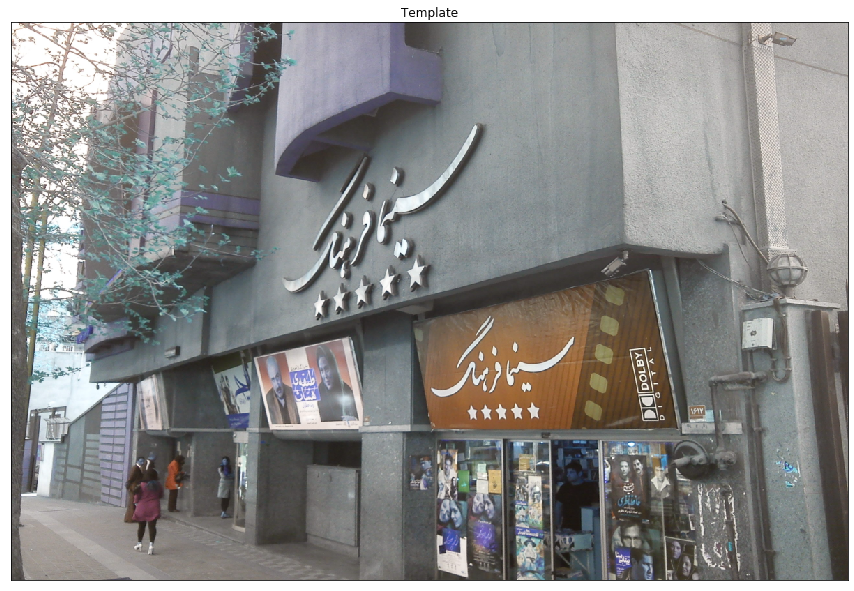

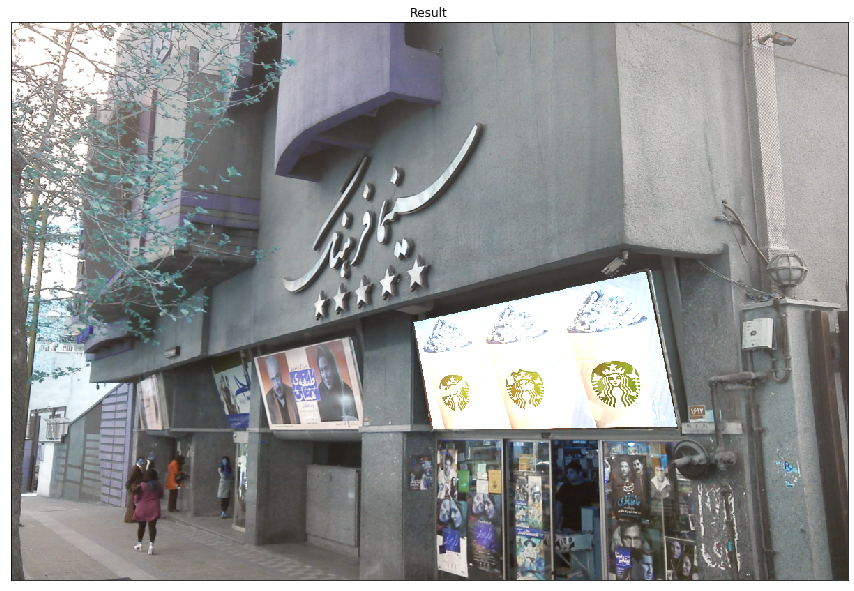

In [13]:
# Read source image.
src = cv2.imread('HW4\\2-3.jpg')
r, c, _ = src.shape

# Four corners of source image
pts_src = np.float32([[0, 0], [c, 0], [c, r], [0, r]])

# Read destination image.
dst = cv2.imread('HW4\\2-2.jpg')
dst = cv2.resize(dst, (1200,800), interpolation = cv2.INTER_AREA)

# Four corners of destination image.
pts_dst = np.float32([[577, 430], [910, 357], [955, 580], [605, 584]])

# Alternate if only 4 points
h = cv2.getPerspectiveTransform(pts_src,pts_dst)

# Warp source image to destination based on homography
src_warped = cv2.warpPerspective(src, h, (dst.shape[1],dst.shape[0]))

# Set BGR color ranges
lowerBound = np.array([0, 255, 0]);
upperBound = np.array([0, 255, 0]);

# Compute mask (roi) from ranges in dst
mask = cv2.inRange(dst, lowerBound, upperBound);

# Dilate mask, if needed, when green border shows
kernel = np.ones((3,3),np.uint8)
mask = cv2.dilate(mask,kernel,iterations = 1)

# Invert mask
inv_mask = cv2.bitwise_not(mask)

# Mask dst with inverted mask
dst_masked = cv2.bitwise_and(dst, dst, mask=inv_mask)

# Put src_warped over dst
result = cv2.add(dst_masked, src_warped)
#show Output Images
_plot(src_warped, 'warped image',(15,15))
_plot(dst_masked, 'Template',(15,15))
_plot(result, 'Result',(15,15))
# Save outputs

# GUI for Online Choosing Points 

1-choose a location for substitution, then choose 4 arbitrary points arround it.

2-double-klick on your arbitrary points.

3-press esc-key to make substitution.

575 430
916 354
962 581
604 586
Choosed Poins:

[[575, 430], [916, 354], [962, 581], [604, 586]]


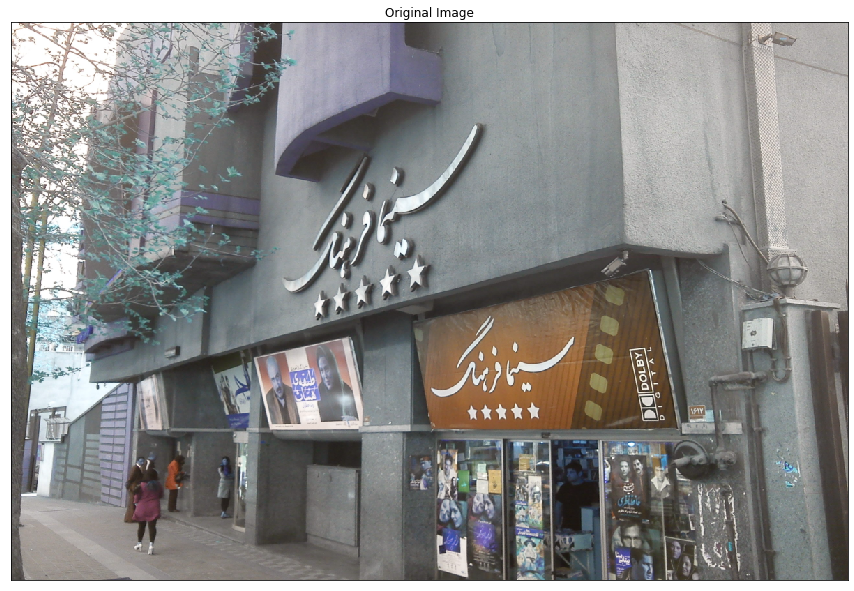

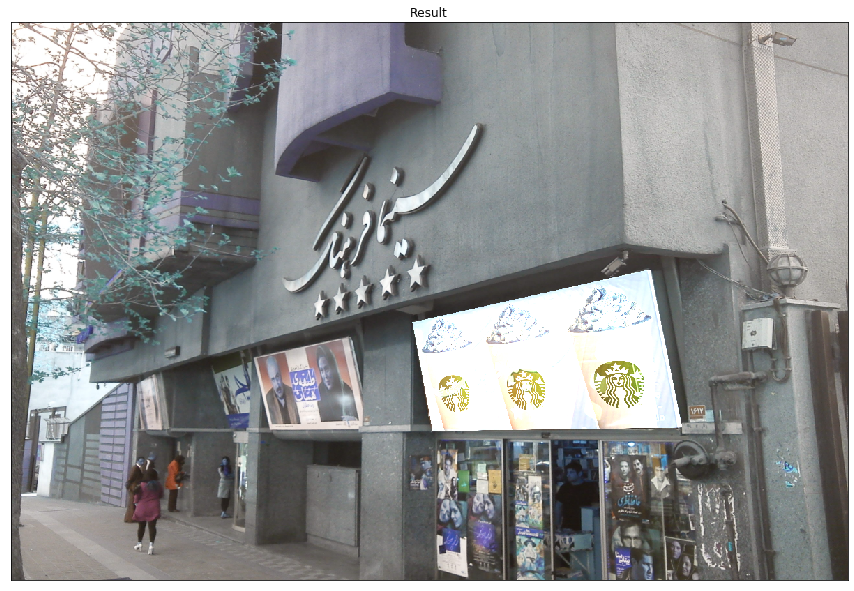

In [15]:
# mouse callback function
points = []
temp = 0
def square_corner(event,x,y,flags,param):
    global points, temp
    i=1
    if event == cv2.EVENT_LBUTTONDBLCLK:# chooing Points with Doubleklick Mouse Event.
        i = i+1
        if i==4:
            temp = 1
        print(x,y)
        points.append([x,y])

# Read source image.
src = cv2.imread('HW4\\2-3.jpg')
r, c, _ = src.shape

# Four corners of source image
pts_src = np.float32([[0, 0], [c, 0], [c, r], [0, r]])

# Read destination image.
dst = cv2.imread('HW4\\2-2.jpg')
dst = cv2.resize(dst, (1200,800), interpolation = cv2.INTER_AREA)

cv2.namedWindow('image')
cv2.setMouseCallback('image',square_corner)
while(1):
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

# Four corners of destination image.
pts_dst = np.float32(points)

# Calculate Homography if more than 4 points(Alternative)
h = cv2.getPerspectiveTransform(pts_src,pts_dst)

# Warp source image to destination based on homography
src_warped = cv2.warpPerspective(src, h, (dst.shape[1],dst.shape[0]))

# Set BGR color ranges
lowerBound = np.array([0, 255, 0]);
upperBound = np.array([0, 255, 0]);

# Compute mask (roi) from ranges in dst
mask = cv2.inRange(dst, lowerBound, upperBound);

# Dilate mask, if needed, when green border shows
kernel = np.ones((3,3),np.uint8)
mask = cv2.dilate(mask,kernel,iterations = 1)

# Invert mask
inv_mask = cv2.bitwise_not(mask)

# Mask dst with inverted mask
dst_masked = cv2.bitwise_and(dst, dst, mask=inv_mask)

# Put src_warped over dst
result = cv2.add(dst_masked, src_warped)

#show Output Images
while(1):
    cv2.imshow('image',result)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()
print('Choosed Poins:\n')
print(points)
_plot(dst, 'Original Image',(15,15))
_plot(result, 'Result',(15,15))

# Test on Image 2-1.jpg

215 306
473 347
470 430
210 404
Choosed Poins:

[[215, 306], [473, 347], [470, 430], [210, 404]]


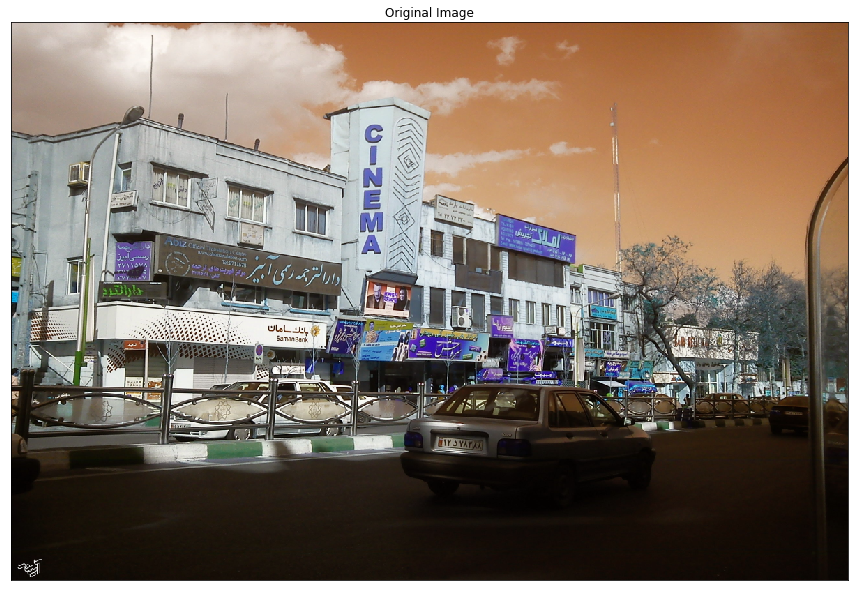

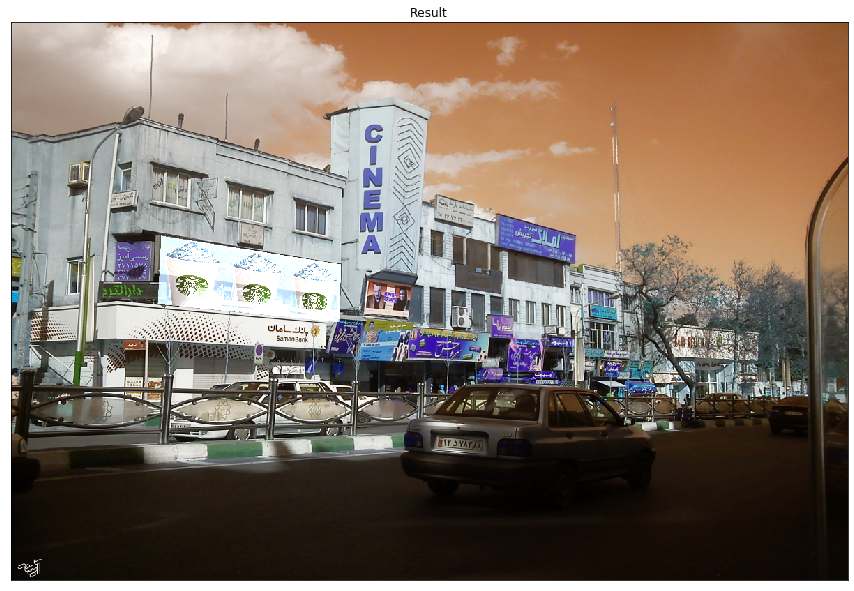

In [16]:
# mouse callback function
points = []
temp = 0
def square_corner(event,x,y,flags,param):
    global points, temp
    i=1
    if event == cv2.EVENT_LBUTTONDBLCLK:
        i = i+1
        if i==4:
            temp = 1
        print(x,y)
        points.append([x,y])

# Read source image.
src = cv2.imread('HW4\\2-3.jpg')
r, c, _ = src.shape

# Four corners of source image
pts_src = np.float32([[0, 0], [c, 0], [c, r], [0, r]])

# Read destination image.
dst = cv2.imread('HW4\\2-1.jpg')
dst = cv2.resize(dst, (1200,800), interpolation = cv2.INTER_AREA)

cv2.namedWindow('image')
cv2.setMouseCallback('image',square_corner)
while(1):
    cv2.imshow('image',dst)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

# Four corners of destination image.
pts_dst = np.float32(points)

# Calculate Homography if more than 4 points(Alternative)
h = cv2.getPerspectiveTransform(pts_src,pts_dst)

# Warp source image to destination based on homography
src_warped = cv2.warpPerspective(src, h, (dst.shape[1],dst.shape[0]))

# Set BGR color ranges
lowerBound = np.array([0, 255, 0]);
upperBound = np.array([0, 255, 0]);

# Compute mask (roi) from ranges in dst
mask = cv2.inRange(dst, lowerBound, upperBound);

# Dilate mask, if needed, when green border shows
kernel = np.ones((3,3),np.uint8)
mask = cv2.dilate(mask,kernel,iterations = 1)

# Invert mask
inv_mask = cv2.bitwise_not(mask)

# Mask dst with inverted mask
dst_masked = cv2.bitwise_and(dst, dst, mask=inv_mask)

# Put src_warped over dst
result = cv2.add(dst_masked, src_warped)

#show Output Images
while(1):
    cv2.imshow('image',result)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()
print('Choosed Poins:\n')
print(points)
_plot(dst, 'Original Image',(15,15))
_plot(result, 'Result',(15,15))